# **Machine Learning Project**

#### Notebook `Exploratory Data Analysis`

#### Group:
- `Miguel Matos - 20221925`
- `Andre Nicolau - 20221918`
- `André Ferreira - 20250398`

---

#### <font> Table of Contents </font> <a class="anchor" id='toc'></a> 
1. [Introduction](#introduction)
2. [Imports](#Imports)  
3. [Exploratory Data Analysis](#exploratory-data-analysis)
- 3.1. [Data Understanding](#data-understanding)
- 3.2. [Data preparation for visualizations](#data-preparation-for-visualizations)


    - 3.2.1. [Removing Invalid Entries](#removing-invalid-entries)
    - 3.2.2. ["brand" variable cleaning](#brand-variable-cleaning)
    - 3.2.3. ["model" variable cleaning](#model-variable-cleaning)
    - 3.2.4. ["fuelType" variable cleaning](#fuelType-variable-cleaning)
    - 3.2.5. ["transmission" variable cleaning](#transmission-variable-cleaning)
    - 3.2.6. ["Brand" missing values filling](#brand-missing-values-filling)

- 3.3. [Numeric Variables' Univariate Distribution](#numeric-variables-univariate-distribution)
- 3.4. [Numerical Bivariate analysis](#numerical-bivariate-analysis)
- 3.5. [Univariate Categorical Distribution](#univariate-categorical-distribution)
- 3.6. [Bivariate Categorical Distribution](#bivariate-categorical-distribution)
 
----

# Introduction
[Back to TOC](#toc)

# Imports
[Back to TOC](#toc)

In [2]:
from functions import *
data = pd.read_csv("/Users/miguelmatos/Documents/GitHub/Machine_Learning_project/ML_Project_Group42/data/train.csv")
pd.set_option("display.max_columns", None)

# Exploratory Data Analysis

## Data Understanding
[Back to TOC](#toc)

In [3]:
data.shape

(75973, 14)

We can oberserve that there are almost 76k rows and only 14 columns.

In [4]:
data.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


In [5]:
data.tail()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
75968,37194,Mercedes,C Class,2015.0,13498,Manual,14480.0,etrol,125.0,53.3,2.0,78.0,0.0,0.0
75969,6265,Audi,Q3,2013.0,12495,Semi-Auto,52134.0,Diesel,200.0,47.9,2.0,38.0,2.0,0.0
75970,54886,Toyota,Aygo,2017.0,8399,Automatic,11304.0,Petrol,145.0,67.0,1.0,57.0,3.0,0.0
75971,860,Audi,Q3,2015.0,12990,Manual,69072.0,iesel,125.0,60.1,2.0,74.0,2.0,0.0
75972,15795,Ford,Fiesta,2018.0,10495,Manual,16709.0,Petro,145.0,64.2,1.1,38.0,1.0,0.0


In [6]:
data.set_index("carID").sort_index()

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
0,Aud,A3,2016.0,10990,Manual,57097.0,Diesel,0.0,83.1,1.6,75.0,4.0,0.0
1,Audi,A7,2017.0,22999,Semi-Auto,24337.0,diesel,150.0,55.4,3.0,31.0,0.0,0.0
2,Audi,A4,2016.0,14242,Manual,14900.0,Petrol,125.0,53.3,1.4,65.0,4.0,0.0
3,Audi,Q3,2017.0,15998,Manual,37151.0,Petrol,145.0,51.4,1.4,55.0,1.0,0.0
4,NaN,A6,2019.0,30850,Automatic,4553.0,Diesel,145.0,47.9,2.0,62.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75968,VW,Golf,2015.0,11299,Manual,24959.0,Petro,NaN,53.3,1.4,86.0,2.0,0.0
75969,VW,Caravelle,2019.0,39950,Automatic,7583.0,Diesel,145.0,32.8,2.0,96.0,2.0,0.0
75970,VW,Golf,2019.0,18995,Automatic,8044.0,Other,145.0,43.5,1.5,80.0,4.0,0.0


As the brands are ordered by "carID" variable, we'll put that variable as index and sort it in ascending order.

In [7]:
data = data.set_index("carID").sort_index()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75973 entries, 0 to 75972
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           74452 non-null  object 
 1   model           74456 non-null  object 
 2   year            74482 non-null  float64
 3   price           75973 non-null  int64  
 4   transmission    74451 non-null  object 
 5   mileage         74510 non-null  float64
 6   fuelType        74462 non-null  object 
 7   tax             68069 non-null  float64
 8   mpg             68047 non-null  float64
 9   engineSize      74457 non-null  float64
 10  paintQuality%   74449 non-null  float64
 11  previousOwners  74423 non-null  float64
 12  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 8.1+ MB


There are some missing values, but the dtypes seem to be accordingly.

In [9]:
data.isna().sum()

Brand             1521
model             1517
year              1491
price                0
transmission      1522
mileage           1463
fuelType          1511
tax               7904
mpg               7926
engineSize        1516
paintQuality%     1524
previousOwners    1550
hasDamage         1548
dtype: int64

Let's take a look into descriptive analysis.

In [10]:
#Non-numeric features analysis
comparison_data = data.describe(exclude=np.number) # This dataset will be used for futher comparisons
data.describe(exclude=np.number)

,Brand,model,transmission,fuelType
count,74452,74456,74451,74462
unique,72,735,40,34
top,Ford,Focus,Manual,Petrol
freq,14808,6353,38050,37995


Insights from non numeric features:
- "Ford Focus" is the most common car from the dataset, with a frequency of 6353.

Now, let's take a look into the unique values of the categorical features.

In [11]:
print(f"Unique values of 'Brands':\n\n {data['Brand'].unique()}\n")
print(f"Unique values of 'model':\n\n {data['model'].unique()}\n")
print(f"Unique values of 'transmission':\n\n {data['transmission'].unique()}\n")
print(f"Unique values of 'fuelType':\n\n {data['fuelType'].unique()}\n")

Unique values of 'Brands':

 ['Aud' 'Audi' nan 'audi' 'udi' 'AUDI' 'UDI' 'ud' 'aud' 'AUD' 'BMW' 'MW'
 'bmw' 'BM' 'mw' 'Ford' 'ford' 'for' 'FORD' 'For' 'ord' 'ORD' 'FOR' 'or'
 'Hyundai' 'Hyunda' 'yundai' 'hyundai' 'HYUNDAI' 'hyunda' 'HYUNDA' 'yunda'
 'Mercedes' 'mercedes' 'MERCEDES' 'ercedes' 'Mercede' 'ercede' 'ERCEDES'
 'MERCEDE' 'mercede' 'Skoda' 'koda' 'SKODA' 'Skod' 'SKOD' 'skoda' 'kod'
 'skod' 'KODA' 'Toyota' 'toyota' 'TOYOTA' 'Toyot' 'oyota' 'TOYOT' 'OYOTA'
 'toyot' 'Opel' 'pel' 'opel' 'Ope' 'OPEL' 'OPE' 'PEL' 'ope' 'pe' 'VW' 'W'
 'v' 'V' 'vw' 'w']

Unique values of 'model':

 ['A3' ' A7' ' A4' ' Q3' ' A6' ' A3' ' A5' ' TT' ' Q7' ' A1' ' Q2' 'A1'
 ' RS5' ' A8' ' Q5' ' A' ' S4' nan ' Q' ' Q8' ' a3' 'A4' ' a5' ' q7' ' a6'
 ' RS3' ' RS6' ' RS4' ' q3' ' a4' ' a1' 'Q3' ' RS' ' S3' ' R8' 'A5' 'RS6'
 ' q5' 'TT' ' S8' 'Q5' ' SQ5' ' q2' 'RS3' 'Q2' ' a7' ' tt' ' a' ' r8' 'A6'
 'A8' 'Q7' 'a8' ' A2' 'Q8' ' SQ7' ' S5' ' T' ' s3' 'R8' 'A7' ' sq7' 'q5'
 ' 1 Series' ' 3 Series' ' 2 Series' ' 1 s

Through this visualization we can see that there are a lot of type erros in the categorical values, so we'll have to find ways to manage this problem, as we need to access it to have proper data. 

In [12]:
#Numeric features
data.describe(include=np.number)

,year,price,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
count,74482.000000,75973.000000,74510.000000,68069.000000,68047.000000,74457.000000,74449.000000,74423.000000,74425.0
mean,2017.096611,16881.889553,23004.184088,120.329078,55.152666,1.660136,64.590667,1.994580,0.0
std,2.208704,9736.926322,22129.788366,65.521176,16.497837,0.573462,21.021065,1.472981,0.0
min,1970.000000,450.000000,-58540.574478,-91.121630,-43.421768,-0.103493,1.638913,-2.345650,0.0
25%,2016.000000,10200.000000,7423.250000,125.000000,46.300000,1.200000,47.000000,1.000000,0.0
50%,2017.000000,14699.000000,17300.000000,145.000000,54.300000,1.600000,65.000000,2.000000,0.0
75%,2019.000000,20950.000000,32427.500000,145.000000,62.800000,2.000000,82.000000,3.000000,0.0
max,2024.121759,159999.000000,323000.000000,580.000000,470.800000,6.600000,125.594308,6.258371,0.0


Relevant insights from the numeric features in the dataset:
- "year" should only cointain integer values

- the minimum "mileage" is negative, which doesn't make sense since it represents the amount of miles a car did.
- the minimum value of "tax" is negative as well and doesn't make sense as well.
- In "mpg" the minimum being a negative value doesn' make sense as well.
- The variable "engineSize" shouldn't have negative values also.
- In "paintQuality%" the maximum value is a value above 100%, which can't be an option as a percentage in this case should be a value between 0 and 100.
- "previousOwners" variable also has negative values and shouldn't, and also should only contain integer values.
- "hasDamage" seems to have no values inserted, which might indicates that this column is irrelevant.

## Data Preparation for visualizations

### Removing Invalid Entries
[Back to TOC](#toc)


##### "year"

This variable should only cointain integer values, but as we can see by the last "describe" method, the max value is a float.

In [13]:
data["year"] = data["year"].apply(lambda x: math.floor(x) if pd.notna(x) else x)
data["year"].describe()

count    74482.000000
mean      2017.091821
std          2.211113
min       1970.000000
25%       2016.000000
50%       2017.000000
75%       2019.000000
max       2024.000000
Name: year, dtype: float64

Now that this column is cleaned, we'll convert the "year" for "age", as the range of the variable would be the same, but having smaller values, and the model will give more relevance to smaller differences, because a difference of 5 is much more relevant in a variable from 0-50 than from 1970-2020.

In [14]:
data["year"] = 2024 - data["year"]
data.rename(columns={"year": "car_age"}, inplace= True)
data

,Brand,model,car_age,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
0,Aud,A3,8.0,10990,Manual,57097.0,Diesel,0.0,83.1,1.6,75.0,4.0,0.0
1,Audi,A7,7.0,22999,Semi-Auto,24337.0,diesel,150.0,55.4,3.0,31.0,0.0,0.0
2,Audi,A4,8.0,14242,Manual,14900.0,Petrol,125.0,53.3,1.4,65.0,4.0,0.0
3,Audi,Q3,7.0,15998,Manual,37151.0,Petrol,145.0,51.4,1.4,55.0,1.0,0.0
4,NaN,A6,5.0,30850,Automatic,4553.0,Diesel,145.0,47.9,2.0,62.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75968,VW,Golf,9.0,11299,Manual,24959.0,Petro,NaN,53.3,1.4,86.0,2.0,0.0
75969,VW,Caravelle,5.0,39950,Automatic,7583.0,Diesel,145.0,32.8,2.0,96.0,2.0,0.0
75970,VW,Golf,5.0,18995,Automatic,8044.0,Other,145.0,43.5,1.5,80.0,4.0,0.0


##### "mileage"

In [15]:
data[data["mileage"] < 0]

,Brand,model,car_age,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
67,Audi,A5,9.0,16250,Manual,-52618.457894,Petrol,200.0,42.8,2.0,94.0,4.00000,0.0
158,Audi,NaN,5.0,22000,Semi-Auto,-52618.457894,Petrol,145.0,40.9,2.0,42.0,0.00000,0.0
247,Audi,TT,22.0,2876,Manual,-52618.457894,Petrol,295.0,30.1,1.8,69.0,3.00000,0.0
303,Audi,A3,11.0,8990,Manual,-52618.457894,Diesel,0.0,74.3,1.6,81.0,4.00000,0.0
304,Audi,A3,7.0,19995,Manual,-52618.457894,Diesel,145.0,65.7,2.0,31.0,3.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75549,VW,Golf SV,8.0,11987,Automatic,-48190.655673,etrol,30.0,54.3,1.4,59.0,-2.34565,0.0
75723,VW,Sharan,6.0,23642,Semi-Auto,-48190.655673,Diesel,145.0,41.5,2.0,36.0,2.00000,0.0
75771,VW,T-Cross,4.0,18990,Manual,-48190.655673,Petrol,145.0,47.9,1.0,49.0,1.00000,0.0


As the number of entries from mileage bellow zero is very small compared to the dataset size, we'll assign them as missing values and then take care of those values after some missing values analysis.

In [16]:
data["mileage"][data["mileage"] < 0] = np.nan

/var/folders/s5/kdw3b2bx40b93wm0h0b6yg7w0000gn/T/ipykernel_27204/2415613594.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data["mileage"][data["mileage"] < 0] = np.nan
/var/folders/s5/kdw3b2bx40b93wm0h0b6yg7w0000gn/T/ipykernel_27204/24

##### "tax"

In [17]:
data[data["tax"] < 0]

,Brand,model,car_age,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
46,Audi,A4,6.0,18288,Semi-Auto,31348.0,Petrol,-60.684095,51.4,1.400000,82.0,2.000000,0.0
268,Audi,A6,NaN,10499,Automatic,92083.0,Diesel,-60.684095,56.5,2.000000,43.0,1.000000,0.0
632,Audi,Q2,4.0,24988,AUTOMATIC,1500.0,Petrol,-60.684095,42.2,NaN,72.0,-2.335123,0.0
718,Audi,A4,6.0,30450,Automatic,11775.0,Petrol,-60.684095,37.7,3.000000,51.0,2.000000,0.0
754,Audi,A4,8.0,18303,Automatic,31817.0,Diesel,-60.684095,65.7,2.000000,34.0,4.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75544,VW,Golf,8.0,11495,Manual,36000.0,Petrol,-49.153541,53.3,0.186425,40.0,0.000000,0.0
75718,VW,Golf,6.0,13749,Manual,26558.0,Diesel,-49.153541,57.7,1.600000,46.0,1.000000,0.0
75770,VW,Caravelle,12.0,18995,Automatic,102000.0,Diesel,-49.153541,34.4,2.000000,78.0,1.000000,0.0


The same as "mileage", so we'll assign those values as missing values.

In [18]:
data["tax"][data["tax"] < 0] = np.nan

/var/folders/s5/kdw3b2bx40b93wm0h0b6yg7w0000gn/T/ipykernel_27204/839513193.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data["tax"][data["tax"] < 0] = np.nan
/var/folders/s5/kdw3b2bx40b93wm0h0b6yg7w0000gn/T/ipykernel_27204/839513193.p

##### "mpg"

In [19]:
print(f" The length of the following dataframe is: {len(data[data['mpg'] < 0])}")
data[data["mpg"] < 0]

 The length of the following dataframe is: 36


,Brand,model,car_age,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
7781,BMW,3 Series,7.0,14800,Manual,29968.0,DIESEL,30.0,-43.421768,2.0,52.0,1.0,0.0
8094,BMW,X3,8.0,15900,Automatic,59692.0,Diesel,145.0,-43.421768,2.0,40.0,4.0,0.0
8314,BMW,5 Series,10.0,14662,Semi-Auto,59317.0,Diesel,30.0,-43.421768,2.0,74.0,4.0,0.0
8542,NaN,3 Series,11.0,16291,Semi-Auto,40900.0,Diesel,145.0,-43.421768,3.0,88.0,NaN,0.0
8691,BMW,1 Series,5.0,17600,Automatic,12839.0,Diesel,145.0,-43.421768,2.0,68.0,1.0,0.0
8956,BMW,7 series,5.0,55000,Automatic,8546.0,Diesel,145.0,-43.421768,3.0,43.0,0.0,0.0
9202,BMW,X1,8.0,17000,Automatic,46968.0,Diesel,125.0,-43.421768,2.0,82.0,0.0,0.0
10078,BMW,6 Series,5.0,31412,Semi-Auto,27713.0,Diesel,145.0,-43.421768,3.0,47.0,1.0,0.0
10214,BMW,3 Series,10.0,14500,Automatic,45140.0,Diesel,125.0,-43.421768,3.0,77.0,2.0,0.0


This column contains only 36 values bellow zero, and every single one of them belongs to the Brand "BMW", so we'll assign them as missing values and when filling the missing values, we'll probably fill these missing values with the mean or median of BMW's mpg.

In [20]:
data["mpg"][data["mpg"] < 0] = np.nan

/var/folders/s5/kdw3b2bx40b93wm0h0b6yg7w0000gn/T/ipykernel_27204/1243779187.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data["mpg"][data["mpg"] < 0] = np.nan
/var/folders/s5/kdw3b2bx40b93wm0h0b6yg7w0000gn/T/ipykernel_27204/1243779187

##### "engineSize"

In [21]:
data[data["engineSize"] < 0]

,Brand,model,car_age,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
15104,Ford,Focu,8.0,9995,Manual,7905.0,Diesel,NaN,NaN,-0.103493,61.0,4.0,0.0
15255,Ford,Focus,14.0,29635,Manual,1577.0,Petrol,NaN,NaN,-0.103493,89.0,2.0,0.0
15492,Ford,Fiesta,6.0,12799,Manual,15526.0,Petrol,145.0,62.8,-0.103493,71.0,3.0,0.0
15698,Ford,Focus,10.0,6790,Manual,51341.0,Petrol,NaN,NaN,-0.103493,43.0,1.0,0.0
15972,FORD,Kuga,5.0,21700,Manual,18612.0,Diesel,145.0,47.9,-0.103493,61.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29674,Ford,Focus,5.0,18550,Automatic,5016.0,Diesel,NaN,64.2,-0.103493,41.0,0.0,0.0
30398,Ford,Fiesta,7.0,10020,Manual,15133.0,Petrol,20.0,62.8,-0.103493,96.0,4.0,0.0
30930,Ford,Focus,9.0,7698,Manual,51060.0,DIESEL,20.0,67.3,-0.103493,77.0,3.0,NaN


It seems that the negative values of the variable "engineSize" is always correlated with the brand "Ford". Let's check if that's really true.

In [22]:
data[(data["engineSize"] < 0) & (data["Brand"] != "Ford")]

,Brand,model,car_age,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
15972,FORD,Kuga,5.0,21700,Manual,18612.0,Diesel,145.0,47.9,-0.103493,61.0,3.0,0.0
16823,NaN,Focus,9.0,8350,Manual,46935.0,Petrol,NaN,NaN,-0.103493,63.0,4.0,0.0
20733,FORD,Focus,6.0,11991,Manual,24174.0,Diesel,145.0,74.3,-0.103493,66.0,4.0,0.0
20920,For,Kuga,7.0,15998,Manual,24024.0,Petrol,150.0,45.6,-0.103493,45.0,0.0,0.0
23079,For,Focus,NaN,20000,Manual,6156.0,Diesel,145.0,57.7,-0.103493,45.0,1.0,0.0
24308,NaN,Fiesta,10.0,5995,Manual,59361.0,Petrol,0.0,65.7,-0.103493,81.0,1.0,0.0
24431,ord,NaN,9.0,6490,Manual,62000.0,Diesel,0.0,74.3,-0.103493,36.0,0.0,0.0
24953,For,Focus,5.0,17990,Manual,2972.0,Petrol,NaN,NaN,-0.103493,84.0,4.0,0.0
25300,For,Focus,10.0,6500,Manual,45073.0,Petrol,20.0,58.9,-0.103493,53.0,0.0,0.0


Here we have the confirmation that this issue is only related with Ford brand, so we'll assign it as missing values and when dealing with them we'll fill them with some metric related with the Ford brand.

In [23]:
data["engineSize"][data["engineSize"] < 0] = np.nan

/var/folders/s5/kdw3b2bx40b93wm0h0b6yg7w0000gn/T/ipykernel_27204/457097309.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data["engineSize"][data["engineSize"] < 0] = np.nan
/var/folders/s5/kdw3b2bx40b93wm0h0b6yg7w0000gn/T/ipykernel_272

##### "paintQuality%"

In [24]:
data[data["paintQuality%"] > 100]

,Brand,model,car_age,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
12,Audi,Q3,7.0,20000,Automatic,21981.0,Petrol,145.0,47.9,1.4,125.301945,1.0,0.0
73,Audi,Q3,5.0,26925,Semi-Auto,6328.0,Diesel,145.0,48.7,2.0,125.301945,1.0,0.0
347,Audi,Q3,5.0,37490,Automatic,NaN,Petrol,145.0,30.7,2.0,125.301945,0.0,0.0
1020,Audi,A4,5.0,43990,Automatic,6500.0,Diesel,145.0,39.2,3.0,125.301945,0.0,0.0
1146,Aud,Q3,9.0,18500,Automatic,26240.0,Diesel,160.0,50.4,2.0,125.301945,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74653,VW,Jetta,9.0,8495,Manual,84700.0,Diesel,20.0,NaN,2.0,125.366507,2.0,0.0
74665,VW,Polo,5.0,14056,Manual,6000.0,Petrol,145.0,52.3,1.0,125.366507,2.0,0.0
74966,VW,Golf,5.0,33750,Semi-Auto,7000.0,Petrol,145.0,36.2,2.0,125.366507,2.0,0.0


It seems to be the same case as the previous variables, small amount of rows and it isn't related to any speific brand. Will be assigned as missing value and treated in the future.

In [25]:
data["paintQuality%"][data["paintQuality%"] > 100] = np.nan

/var/folders/s5/kdw3b2bx40b93wm0h0b6yg7w0000gn/T/ipykernel_27204/1763353316.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data["paintQuality%"][data["paintQuality%"] > 100] = np.nan
/var/folders/s5/kdw3b2bx40b93wm0h0b6yg7w0000gn/T/ipyk

##### "previousOwners"

In [26]:
data[data["previousOwners"] < 0]

,Brand,model,car_age,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
213,Audi,Q3,5.0,28950,Semi-Auto,4443.0,Petro,145.0,38.2,1.5,49.0,-2.335123,0.0
230,AUDI,A3,5.0,26290,Semi-Auto,3345.0,Diesel,145.0,51.4,2.0,38.0,-2.335123,0.0
479,Audi,A1,9.0,8099,Manual,67830.0,Diesel,0.0,80.7,1.6,93.0,-2.335123,0.0
547,Audi,A1,9.0,10000,NaN,40365.0,Diesel,0.0,80.7,1.6,80.0,-2.335123,0.0
632,Audi,Q2,4.0,24988,AUTOMATIC,1500.0,Petrol,NaN,42.2,NaN,72.0,-2.335123,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75498,VW,Polo,8.0,12495,Semi-Auto,8695.0,Petrol,20.0,60.1,1.2,61.0,-2.345650,0.0
75542,VW,T-Roc,6.0,17941,Manual,17521.0,petrol,150.0,55.4,1.0,51.0,-2.345650,0.0
75549,VW,Golf SV,8.0,11987,Automatic,NaN,etrol,30.0,54.3,1.4,59.0,-2.345650,0.0


In [27]:
data["previousOwners"][data["previousOwners"] < 0] = np.nan

/var/folders/s5/kdw3b2bx40b93wm0h0b6yg7w0000gn/T/ipykernel_27204/2453159554.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data["previousOwners"][data["previousOwners"] < 0] = np.nan
/var/folders/s5/kdw3b2bx40b93wm0h0b6yg7w0000gn/T/ipyk

In [28]:
data["previousOwners"] = data["previousOwners"].apply(lambda x: math.floor(x) if pd.notna(x) else x)
data["previousOwners"].describe()

count    74052.000000
mean         2.015057
std          1.440985
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: previousOwners, dtype: float64

Now, there are no negative values on "previousOwners" and all the values are now integers as they were all rounded to the floor value.

##### "hasDamage"

This column may have missing values in the case where the car painting quality is low or it had a lot of previous owners is high, which could mean that there is a higher chance if having damage.

In [29]:
print(f"Previous Owners column where 'hasDamage' is a missing value: \n{data['previousOwners'][data['hasDamage'].isna() == True].describe()}")
print(f"\nNormal Previous Owners column: \n{data['previousOwners'].describe()}")

Previous Owners column where 'hasDamage' is a missing value: 
count    1517.000000
mean        2.042189
std         1.472998
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: previousOwners, dtype: float64

Normal Previous Owners column: 
count    74052.000000
mean         2.015057
std          1.440985
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: previousOwners, dtype: float64


In [30]:
print(f"Paint Quality column where 'hasDamage' is a missing value: \n{data['paintQuality%'][data['hasDamage'].isna() == True].describe()}")
print(f"\nNormal Paint Quality column: \n{data['paintQuality%'].describe()}")

Paint Quality column where 'hasDamage' is a missing value: 
count    1513.000000
mean       64.290631
std        20.474094
min         2.725153
25%        47.000000
50%        64.000000
75%        81.000000
max        99.000000
Name: paintQuality%, dtype: float64

Normal Paint Quality column: 
count    74082.000000
mean        64.290118
std         20.633703
min          1.638913
25%         47.000000
50%         64.000000
75%         82.000000
max         99.000000
Name: paintQuality%, dtype: float64


Through this visualizations we can see that there is no relevant difference between the missing values and the normal values, so we'll proceed to remove the colummn.

In [31]:
data.drop("hasDamage", axis = 1, inplace= True)

#### Text normalization for categorical variables cleaning

In order to be able to plot bar plots for the categorical features in the future, the type errors need to be fixed, otherwise it won't be possible to plot it, as it is in the case of "model" feature, 735 unique values is too much.

As the first step, we'll normalize the text, putting everything in lower case and also eliminating some punctoation and extra spaces.

In [32]:
data["model"] = data["model"].apply(normalize_text)
data["Brand"] = data["Brand"].apply(normalize_text)
data["transmission"] = data["transmission"].apply(normalize_text)
data["fuelType"] = data["fuelType"].apply(normalize_text)

In [33]:
print(data.describe(exclude=np.number))
print(f"\nUnique values of 'Brands':\n\n {data['Brand'].unique()}\n")
print(f"Unique values of 'model':\n\n {data['model'].unique()}\n")
print(f"Unique values of 'transmission':\n\n {data['transmission'].unique()}\n")
print(f"Unique values of 'fuelType':\n\n {data['fuelType'].unique()}\n")

        Brand  model transmission fuelType
count   74452  74456        74451    74462
unique     33    295           17       16
top      ford  focus       manual   petrol
freq    15431   6775        40026    39536

Unique values of 'Brands':

 ['aud' 'audi' nan 'udi' 'ud' 'bmw' 'mw' 'bm' 'ford' 'for' 'ord' 'or'
 'hyundai' 'hyunda' 'yundai' 'yunda' 'mercedes' 'ercedes' 'mercede'
 'ercede' 'skoda' 'koda' 'skod' 'kod' 'toyota' 'toyot' 'oyota' 'opel'
 'pel' 'ope' 'pe' 'vw' 'w' 'v']

Unique values of 'model':

 ['a3' 'a7' 'a4' 'q3' 'a6' 'a5' 'tt' 'q7' 'a1' 'q2' 'rs5' 'a8' 'q5' 'a'
 's4' nan 'q' 'q8' 'rs3' 'rs6' 'rs4' 'rs' 's3' 'r8' 's8' 'sq5' 'a2' 'sq7'
 's5' 't' '1 series' '3 series' '2 series' 'x1' 'x3' 'x5' '5 series' 'z4'
 '4 series' 'x6' 'x2' '2 serie' '5 serie' '6 series' 'x4' '7 series'
 '3 serie' 'm3' 'm4' 'i8' 'x' 'x7' 'm2' 'm' 'm5' '4 serie' '1 serie' 'z3'
 'i3' 'z' '8 series' 'm6' '7 serie' '8 serie' 'i' '6 serie' 'focus' 'focu'
 'fiesta' 'kuga' 'puma' 'ecosport' 'ka' 'edge' 's-

As we can verify, after the text normalization, the number of unique values has already reduced drasticly, but there are still a lot of typos.

### "brand" variable cleaning
[Back to TOC](#toc)

In [34]:
data["Brand"].unique()

array(['aud', 'audi', nan, 'udi', 'ud', 'bmw', 'mw', 'bm', 'ford', 'for',
       'ord', 'or', 'hyundai', 'hyunda', 'yundai', 'yunda', 'mercedes',
       'ercedes', 'mercede', 'ercede', 'skoda', 'koda', 'skod', 'kod',
       'toyota', 'toyot', 'oyota', 'opel', 'pel', 'ope', 'pe', 'vw', 'w',
       'v'], dtype=object)

Here it's possible to clean the unique values left with a dictionary as the names are in order and they aren't a lot of unique values.

In [35]:
correct_brands = {"Audi": ['aud', 'audi', 'udi', 'ud'],
                  "BMW": ['bmw', 'mw', 'bm'],
                  "Ford": ['ford', 'for', 'ord', 'or'],
                  "Hyundai" : ['hyundai', 'hyunda', 'yundai', 'yunda'],
                  "Mercedes" : ['mercedes','ercedes', 'mercede', 'ercede'],
                  "Skoda": ['skoda', 'koda', 'skod', 'kod'],
                  "Toyota": ['toyota', 'toyot', 'oyota'],
                  "Opel": ['opel', 'pel', 'ope', 'pe'],
                  "VW": ['vw', 'w','v']}

variant_to_brand = {variant: brand for brand, variants in correct_brands.items() for variant in variants}
data["Brand"] = data["Brand"].map(variant_to_brand)
data["Brand"].unique()

array(['Audi', nan, 'BMW', 'Ford', 'Hyundai', 'Mercedes', 'Skoda',
       'Toyota', 'Opel', 'VW'], dtype=object)

In [36]:
data["Brand"].value_counts()

Brand
Ford        16063
Mercedes    11674
VW          10385
Opel         9352
BMW          7392
Audi         7325
Toyota       4622
Skoda        4303
Hyundai      3336
Name: count, dtype: int64

### "model" variable cleaning
[Back to TOC](#toc)

Firstly, we'll create a dataframe that contains the car models grouped by brand.

In [37]:
models_per_brand = pd.DataFrame(data.groupby(by =["Brand"])["model"].unique())
models_per_brand["model"] = models_per_brand["model"].apply(lambda x: [model for model in x if pd.notna(model)])
models_per_brand

,model
Brand,
Audi,"[a3, a7, a4, q3, a5, tt, q7, a1, q2, rs5, a8, ..."
BMW,"[1 series, 3 series, 2 series, x1, x3, x5, 5 s..."
Ford,"[focus, focu, fiesta, kuga, puma, ecosport, ka..."
Hyundai,"[i30, ix20, i10, i800, kona, tucson, ioniq, i2..."
Mercedes,"[c class, sl clas, slk, gle class, a class, gl..."
Opel,"[corsa, astra, crossland x, zafira, mokka x, m..."
Skoda,"[fabia, yeti outdoor, rapid, kodiaq, superb, o..."
Toyota,"[yaris, aygo, c-hr, gt86, ayg, auris, rav4, pr..."
VW,"[golf, t-cross, polo, up, tiguan, golf sv, tou..."


There is a really common typo easy to verify in the "eye test", which is having "clas" instead of class. We'll proceed to correct this typo in order to facilitate the process of finding similar model names.

In [38]:
models_per_brand["model"] = models_per_brand["model"].apply(lambda x: [re.sub(r'\bclas\b', 'class', str(model)) for model in x])
models_per_brand

,model
Brand,
Audi,"[a3, a7, a4, q3, a5, tt, q7, a1, q2, rs5, a8, ..."
BMW,"[1 series, 3 series, 2 series, x1, x3, x5, 5 s..."
Ford,"[focus, focu, fiesta, kuga, puma, ecosport, ka..."
Hyundai,"[i30, ix20, i10, i800, kona, tucson, ioniq, i2..."
Mercedes,"[c class, sl class, slk, gle class, a class, g..."
Opel,"[corsa, astra, crossland x, zafira, mokka x, m..."
Skoda,"[fabia, yeti outdoor, rapid, kodiaq, superb, o..."
Toyota,"[yaris, aygo, c-hr, gt86, ayg, auris, rav4, pr..."
VW,"[golf, t-cross, polo, up, tiguan, golf sv, tou..."


In [39]:
brands = models_per_brand.index.tolist()

for models, brand in zip(models_per_brand["model"], brands):
    canonical_names = {}  # to store canonical form for each variant

    for model in models:
        if model in canonical_names:
            continue  # already assigned

        # adaptive threshold
        threshold = 90 if len(model) < 4 else 75

        # find similar models within this brand
        matches = process.extract(model, models, scorer=fuzz.token_sort_ratio)
        close = [m for m, score, _ in matches if score >= threshold]
        for c in close:
            canonical_names[c] = model  # group under canonical name

    data.loc[data["Brand"] == brand , "model"] = data.loc[data["Brand"] == brand, "model"].map(canonical_names).fillna(data.loc[data["Brand"] == brand, "model"])

data["model"] = data["model"].str.capitalize()


In [40]:
#Verifying if the names are correctly changed
canonical_names = {key: value for key, value in canonical_names.items() if key != value}
canonical_names

{'gol': 'golf',
 'golf s': 'golf sv',
 't-cros': 't-cross',
 'pol': 'polo',
 'tigua': 'tiguan',
 'toura': 'touran',
 'passa': 'passat',
 'scirocc': 'scirocco',
 't-ro': 't-roc',
 'touare': 'touareg',
 'shara': 'sharan',
 'tiguan allspac': 'tiguan allspace',
 'arteo': 'arteon',
 'beetl': 'beetle',
 'caddy maxi lif': 'caddy maxi life',
 'caddy maxi': 'caddy maxi life',
 'caddy life': 'caddy maxi life',
 'caravell': 'caravelle',
 'amaro': 'amarok'}

In [41]:
single_char = []

In [42]:
data.describe(exclude=np.number)

,Brand,model,transmission,fuelType
count,74452,74456,74451,74462
unique,9,226,17,16
top,Ford,A class,manual,petrol
freq,16063,7258,40026,39536


In [43]:
data["model"].unique()

array(['A3', 'A7', 'A4', 'Q3', 'A6', 'A5', 'Tt', 'Q7', 'A1', 'Q2', 'Rs5',
       'A8', 'Q5', 'A', 'S4', nan, 'Q', 'Q8', 'Rs3', 'Rs6', 'Rs4', 'Rs',
       'S3', 'R8', 'S8', 'Sq5', 'A2', 'Sq7', 'S5', 'T', '8 series', 'X1',
       'X3', 'X5', '1 series', 'Z4', '4 series', 'X6', 'X2', '2 serie',
       '6 series', 'X4', '7 series', 'M3', 'M4', 'I8', '5 series', 'X',
       'X7', 'M2', 'M', '2 series', 'M5', '3 series', 'Z3', 'I3', 'Z',
       'M6', 'I', 'Focus', 'Fiesta', 'Kuga', 'Puma', 'Ecosport', 'Ka',
       'Edge', 'S-max', 'Fusion', 'C-ma', 'Grand c-max', 'Mondeo',
       'Tourneo connect', 'Galaxy', 'Mustang', 'Tourneo custom', 'Fiest',
       'C-max', 'Grand c-ma', 'Streetka', 'K', 'Ranger', 'Focu', 'B-max',
       'Escort', 'I30', 'Ix20', 'I10', 'I800', 'Kona', 'Tucson', 'Ioniq',
       'I40', 'Getz', 'Santa fe', 'Ix35', 'I1', 'I2', 'Terracan', 'I20',
       'Accent', 'Veloste', 'A class', 'Sl clas', 'Slk', 'Glb class',
       'M class', 'C class', 'Sl class', 'Gla clas', 'Cls cla

In [44]:
data["model"].value_counts()

model
A class       7258
Focus         6911
Fiesta        4469
8 series      3779
Golf          3333
              ... 
I                1
Yari             1
Fiest            1
Grand c-ma       1
Pol              1
Name: count, Length: 226, dtype: int64

### "fuelType" variable cleaning
[Back to TOC](#toc)

In [45]:
data["fuelType"].unique()

array(['diesel', 'petrol', 'petro', 'etrol', 'iesel', nan, 'diese',
       'hybrid', 'etro', 'iese', 'ybrid', 'other', 'hybri', 'othe',
       'electric', 'ybri', 'ther'], dtype=object)

In [46]:
correct_fueltype = {"Diesel": ["diesel", "iesel", "diese", "iese"],
                    "Petrol": ["petrol", "petro", "etrol", "etro"],
                    "Hybrid": ["hybrid", "ybrid", "hybri", "ybri"],
                    "Other": ["other", "ther", "othe"],
                    "Eletric": "eletric"}

variant_to_fuelType = {variant: fuelType for fuelType, variants in correct_fueltype.items() for variant in variants}
data["fuelType"] = data["fuelType"].map(variant_to_fuelType)
data["fuelType"].unique()


array(['Diesel', 'Petrol', nan, 'Hybrid', 'Other'], dtype=object)

In [47]:
data["fuelType"].value_counts()

fuelType
Petrol    41181
Diesel    30885
Hybrid     2225
Other       167
Name: count, dtype: int64

### "transmission" variable cleaning
[Back to TOC](#toc)

In [48]:
data["transmission"].unique()

array(['manual', 'semi-auto', 'automatic', 'anual', 'manua', 'emi-auto',
       nan, 'unknown', 'semi-aut', 'nknown', 'automati', 'utomatic',
       'anua', 'unknow', 'emi-aut', 'utomati', 'other', 'nknow'],
      dtype=object)

In [49]:
correct_transmissions = {
    "Manual": ["manual", "anual", "manua", "anua"],
    "Semi-Auto": ["semi-auto", "emi-auto", "semi-aut", "emi-aut"],
    "Automatic": ["automatic", "automati", "utomatic", "utomati"],
    "Unknown": ["unknown", "unknow", "nknown", "nknow"],"Other": ["other"]}

variant_to_transmissions = {variant: transmissions for transmissions, variants in correct_transmissions.items() for variant in variants}
data["transmission"] = data["transmission"].map(variant_to_transmissions)
data["transmission"].unique()


array(['Manual', 'Semi-Auto', 'Automatic', nan, 'Unknown', 'Other'],
      dtype=object)

In [50]:
data["transmission"].value_counts()

transmission
Manual       41627
Semi-Auto    16872
Automatic    15211
Unknown        736
Other            5
Name: count, dtype: int64

In [51]:
#Plotting the data recorded before the cleaning
comparison_data

,Brand,model,transmission,fuelType
count,74452,74456,74451,74462
unique,72,735,40,34
top,Ford,Focus,Manual,Petrol
freq,14808,6353,38050,37995


In [52]:
data.describe(exclude= np.number)

,Brand,model,transmission,fuelType
count,74452,74456,74451,74458
unique,9,226,5,4
top,Ford,A class,Manual,Petrol
freq,16063,7258,41627,41181


We can verify through this two visualizations, that the unique values of each categorical variable have decreased drastically as a consequence of the data cleaning.

### "Brand" missing values filling
[Back to TOC](#toc)

In this step we will feel the brand missing values based on the car model, if a model belongs to a certain brand, we know the brand. This step can only be done before splitting the data, because we are not relying on any statistical information or knowledge about the data that would lead to data leakage from the validation dataset.

In [53]:
brand_per_model = (
    data.groupby("model")["Brand"]
        .unique()                       # get unique brands per model (still lists)
        .apply(lambda x: [b for b in x if pd.notna(b)])  # remove NaNs
        .apply(lambda x: x[0] if len(x) > 0 else None) # take first brand as string
        .to_dict()                        # convert to dictionary
)

brand_per_model

{'1 series': 'BMW',
 '2 serie': 'BMW',
 '2 series': None,
 '200': 'Mercedes',
 '220': 'Mercedes',
 '230': 'Mercedes',
 '3 series': None,
 '4 series': 'BMW',
 '5 series': None,
 '6 series': 'BMW',
 '7 series': 'BMW',
 '8 series': 'BMW',
 'A': 'Audi',
 'A clas': 'Mercedes',
 'A class': 'Mercedes',
 'A1': 'Audi',
 'A2': 'Audi',
 'A3': 'Audi',
 'A4': 'Audi',
 'A5': 'Audi',
 'A6': 'Audi',
 'A7': 'Audi',
 'A8': 'Audi',
 'Accent': 'Hyundai',
 'Adam': 'Opel',
 'Agila': 'Opel',
 'Amarok': 'VW',
 'Ampera': 'Opel',
 'Antara': 'Opel',
 'Arteon': 'VW',
 'Astr': None,
 'Astra': 'Opel',
 'Auri': 'Toyota',
 'Auris': None,
 'Avensis': 'Toyota',
 'Aygo': 'Toyota',
 'B clas': 'Mercedes',
 'B class': None,
 'B-max': None,
 'Beetle': 'VW',
 'C clas': 'Mercedes',
 'C class': 'Mercedes',
 'C-hr': 'Toyota',
 'C-ma': 'Ford',
 'C-max': None,
 'Caddy': 'VW',
 'Caddy maxi life': 'VW',
 'California': 'VW',
 'Camry': 'Toyota',
 'Caravelle': 'VW',
 'Cascada': 'Opel',
 'Cc': 'VW',
 'Citigo': 'Skoda',
 'Cl clas': 'Mer

In [54]:
data["Brand"].isna().sum()

1521

In [55]:
data["Brand"] = data["Brand"].fillna(data["model"].map(brand_per_model))
print(f"We reduced the number of missing values in 'Brand' from 1521 to {data['Brand'].isna().sum()}, which means we filled {1521-data['Brand'].isna().sum()} rows.")

We reduced the number of missing values in 'Brand' from 1521 to 236, which means we filled 1285 rows.


## Univariate Distributions
[Back to TOC](#toc)

Let's proceed with plotting a histogram for all the variables.

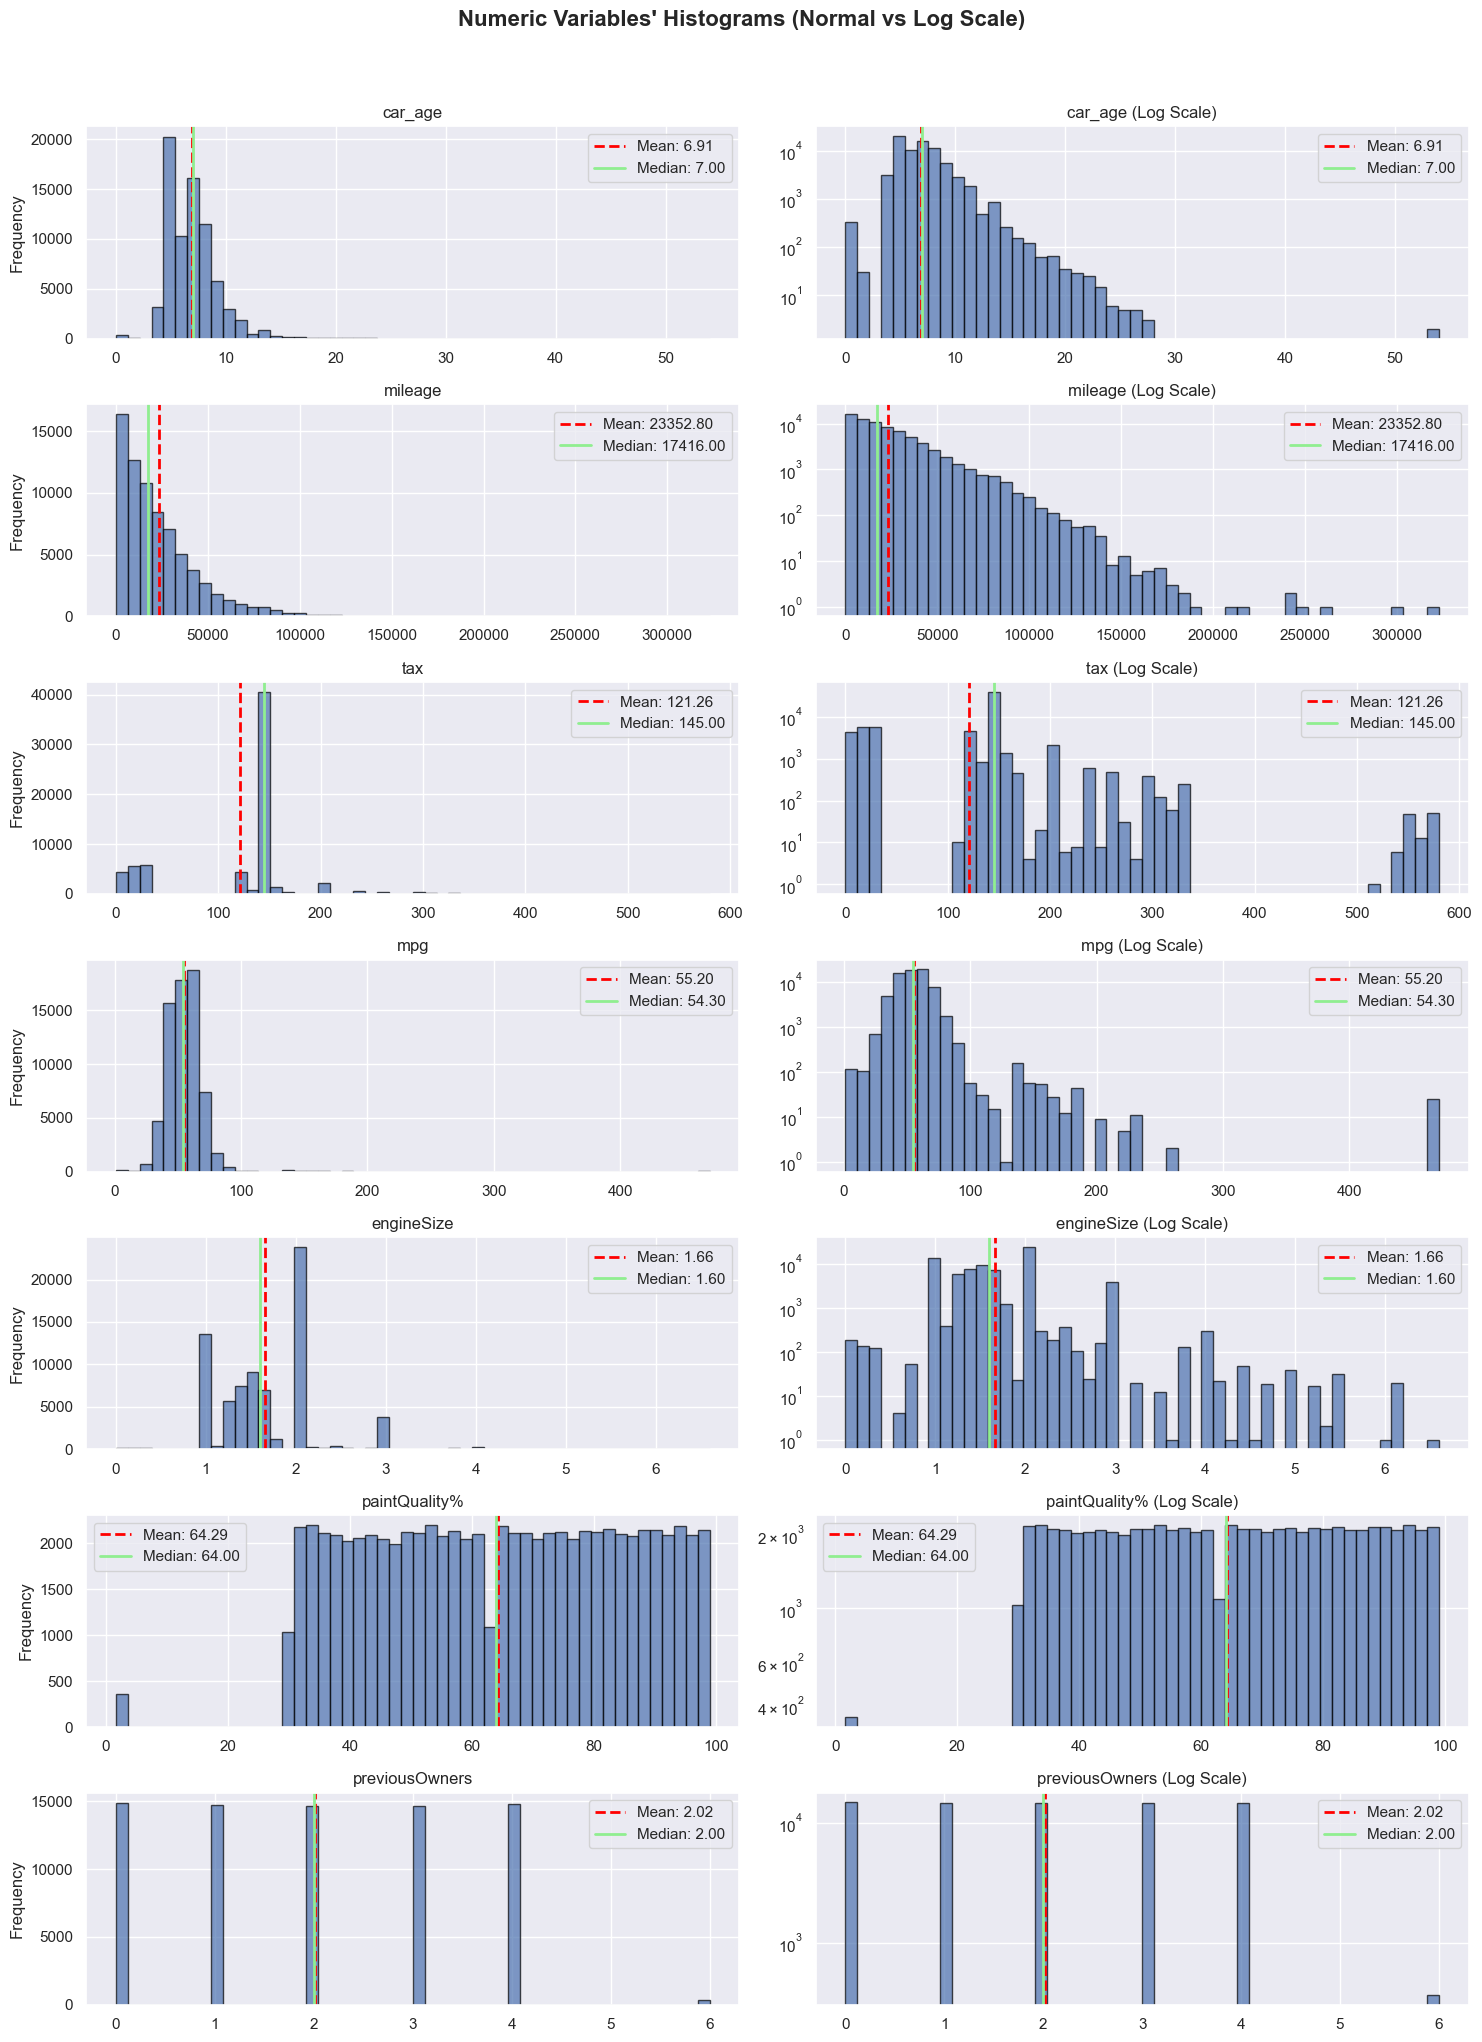

In [56]:
# Plot ALL Numeric Variables' Histograms in one figure
sns.set(style= "darkgrid")

metric_features = data.select_dtypes(include=np.number).drop("price", axis= 1)

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(7, 2, figsize=(15, 20))

# Loop through each feature
for i, feat in enumerate(metric_features):

    # Calculate mean and median
    mean_val = data[feat].mean()
    median_val = data[feat].median()
    
    # Left plot: normal histogram
    axes[i, 0].hist(data[feat], bins = 50, edgecolor= "black", alpha = 0.7)
    axes[i, 0].set_title(f"{feat}")
    axes[i, 0].set_ylabel("Frequency")
    axes[i, 0].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i, 0].axvline(median_val, color='lightgreen', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[i, 0].legend()

    # Right plot: log-scale histogram
    axes[i, 1].hist(data[feat], bins= 50, log = True, edgecolor= "black", alpha = 0.7)
    axes[i, 1].set_title(f"{feat} (Log Scale)")
    axes[i, 1].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i, 1].axvline(median_val, color='lightgreen', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[i, 1].legend()

# Adjust layout and add overall title
fig.suptitle("Numeric Variables' Histograms (Normal vs Log Scale)", fontsize=16, y=1.02, fontweight='bold')
plt.tight_layout()
plt.show()

Most relevant take outs from these visualizations:
- "car_age" feature is a left skewed distribution, in which indicates that most cars are recent and some of them are old. The old cares are possible outliers or meaningful information, so this case needs to be analysed.

- "mileage" contains some negative values that need to be deleted.

- "tax" also contaim negative values which doesn't make sense.

- "mpg" is a variable that, once more, contain negative values.

- "engineSize" contains some negative values that need to be taken out and may have some outliers, because values above 3 are quite rare.

- "paintQuality%" shouldn't have values bellow 0 or above 100.

- "previousOwners" cannot have negative values and should only contain integers.

- "hasDamage" only has one value.

The following step is to plot the boxplot graphs of all features.

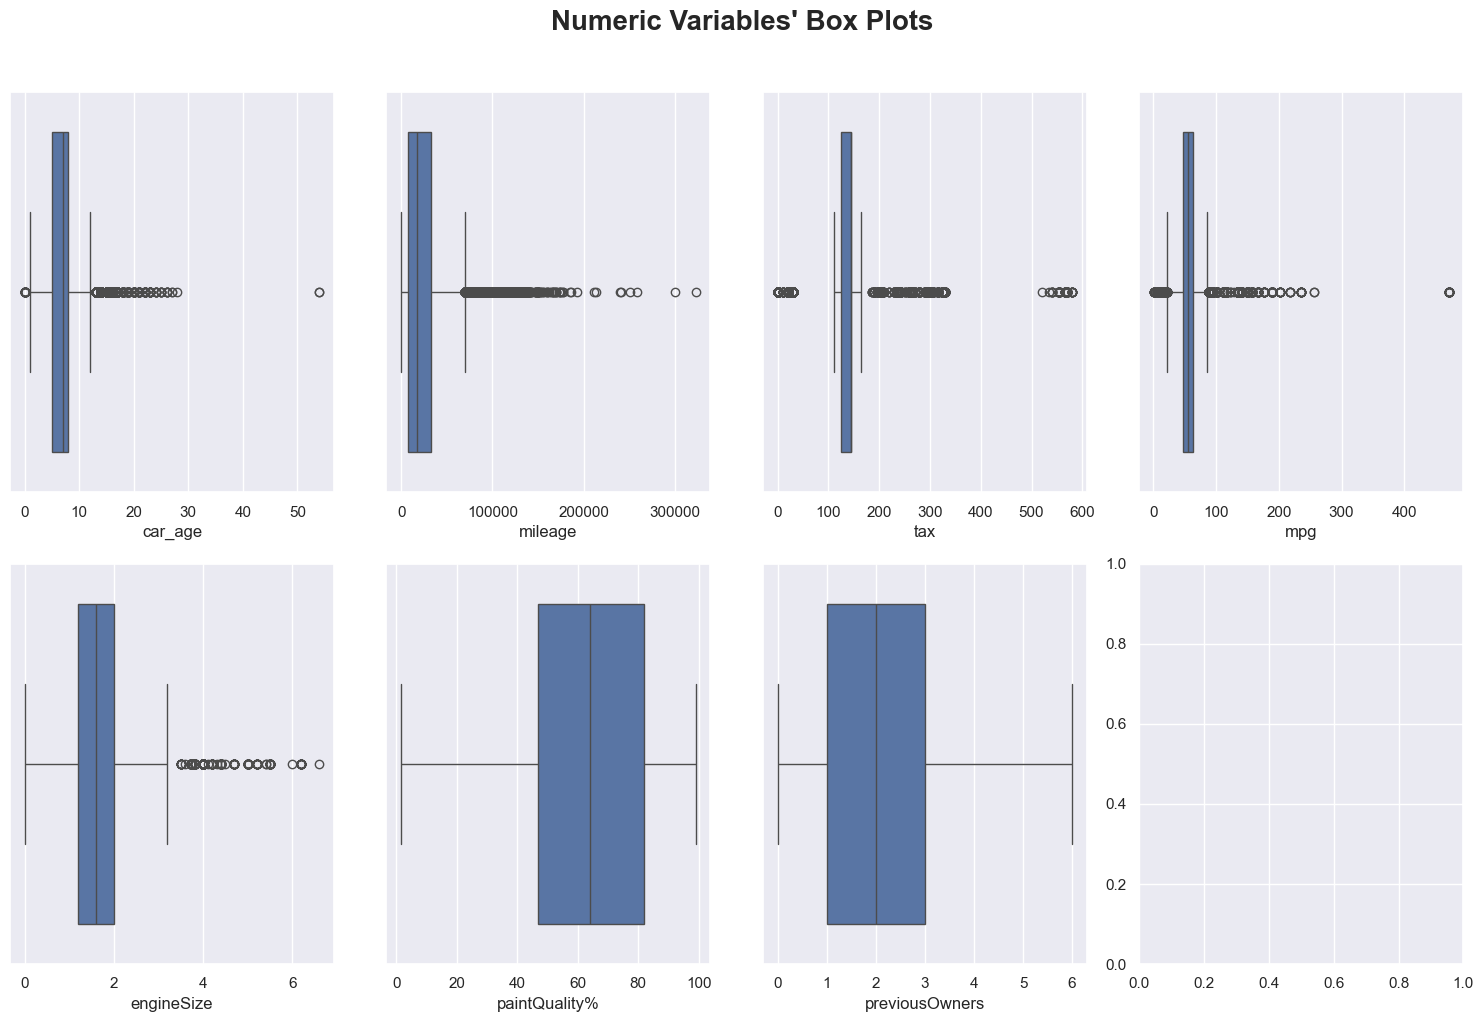

In [57]:
# Plot ALL Numeric Variables' Histograms in one figure

sns.set(style= "darkgrid", context= "notebook") ## Reset to darkgrid

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, 4, figsize=(15, 10),tight_layout=True)

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=data[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
plt.suptitle("Numeric Variables' Box Plots", fontsize=20, y=1.02, fontweight='bold')
plt.show()


- Through the boxplots we can verify that the variables "car_age", "mileage", "tax", "mpg" and "enigneSize" are quite to very skewed.

- The variables "paintQuality%" and "previousOwners" seem to follow a distribution close to normal distribution.

### Analysis of the Target Variable
[Back to TOC](#toc)

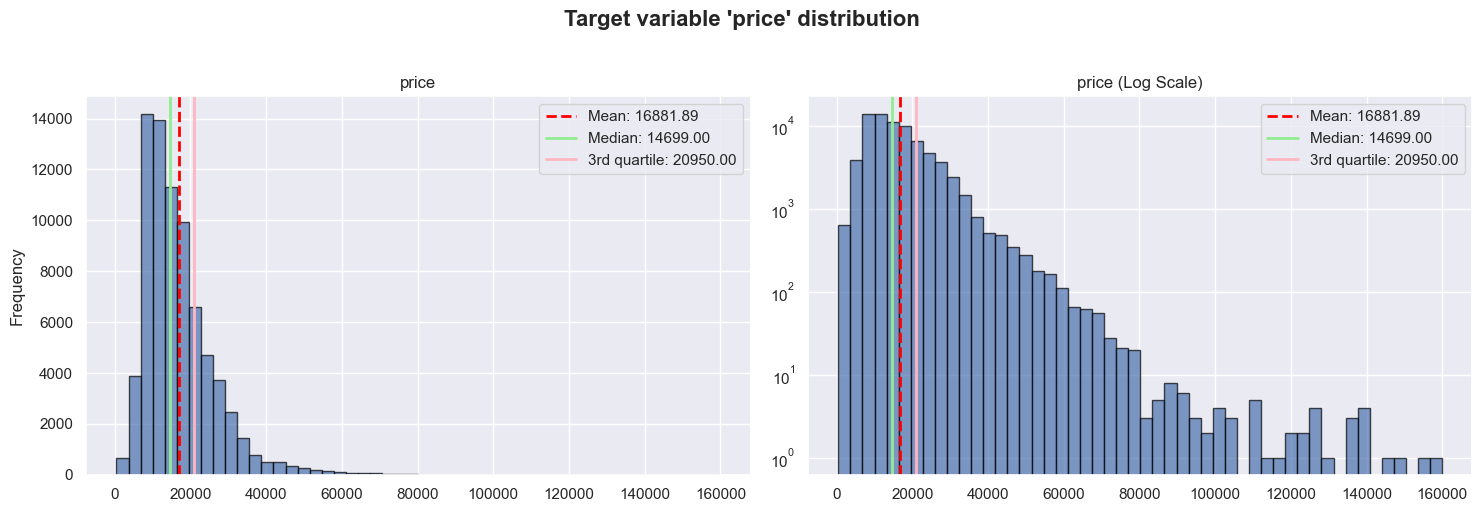

In [58]:
# Plot ALL Numeric Variables' Histograms in one figure
sns.set(style= "darkgrid")
# Prepare figure. Create individual ax where each histogram will be placed
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Loop through each feature

# Calculate mean and median
mean_val = data["price"].mean()
median_val = data["price"].median()
third_quartile = data["price"].quantile(0.75)
    
# Left plot: normal histogram
ax[0].hist(data["price"], bins = 50, edgecolor= "black", alpha = 0.7)
ax[0].set_title(f"price")
ax[0].set_ylabel("Frequency")
ax[0].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
ax[0].axvline(median_val, color='lightgreen', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
ax[0].axvline(third_quartile, color='lightpink', linestyle='-', linewidth=2, label=f'3rd quartile: {third_quartile:.2f}')
ax[0].legend()

# Right plot: log-scale histogram
ax[1].hist(data["price"], bins= 50, log = True, edgecolor= "black", alpha = 0.7)
ax[1].set_title(f"price (Log Scale)")
ax[1].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
ax[1].axvline(median_val, color='lightgreen', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
ax[1].axvline(third_quartile, color='lightpink', linestyle='-', linewidth=2, label=f'3rd quartile: {third_quartile:.2f}')
ax[1].legend()

# Adjust layout and add overall title
fig.suptitle("Target variable 'price' distribution", fontsize=16, y=1.02, fontweight='bold')
plt.tight_layout()
plt.show()

Through this visualizations we can verify that the target variable "price" follows a right skewed distribution, containing most of his values in the "average car price", having a median of almost 15k pounds, and the third quartile being equivalent to almost 21k pounds, which means that 75% of this variable values are lower than 21k pounds.

As we can observe from in the left graph and specially in the log scaled graph, in the right, there are still some values of very expensive cars, having some values above 100k pounds. 

What this tells us is that a predictive model might stuggle more to predict correctly expensive cars, as the dataset is really skewed to the more "cheap" ones.

This deserves our attention in future work, in order to get a good predictive model even for expensive cars.

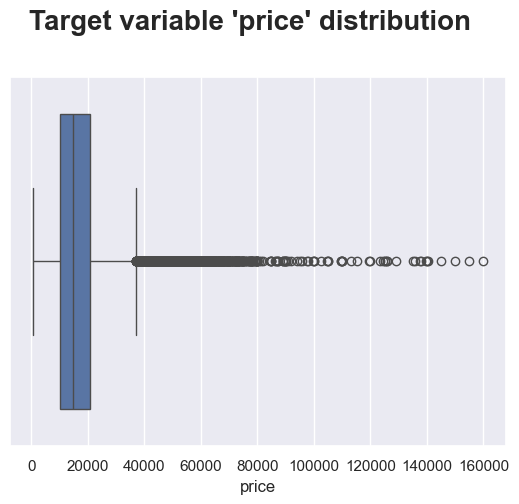

In [59]:
# Plot ALL Numeric Variables' Histograms in one figure

sns.set(style= "darkgrid", context= "notebook") ## Reset to darkgrid
sns.boxplot(x=data["price"])
# Layout
# Add a centered title to the figure:
plt.suptitle("Target variable 'price' distribution", fontsize=20, y=1.02, fontweight='bold')
plt.show()

Here we can verify what was observed before. It is a very skewed variable, containning a lot of "outliers" representing expensive cars.

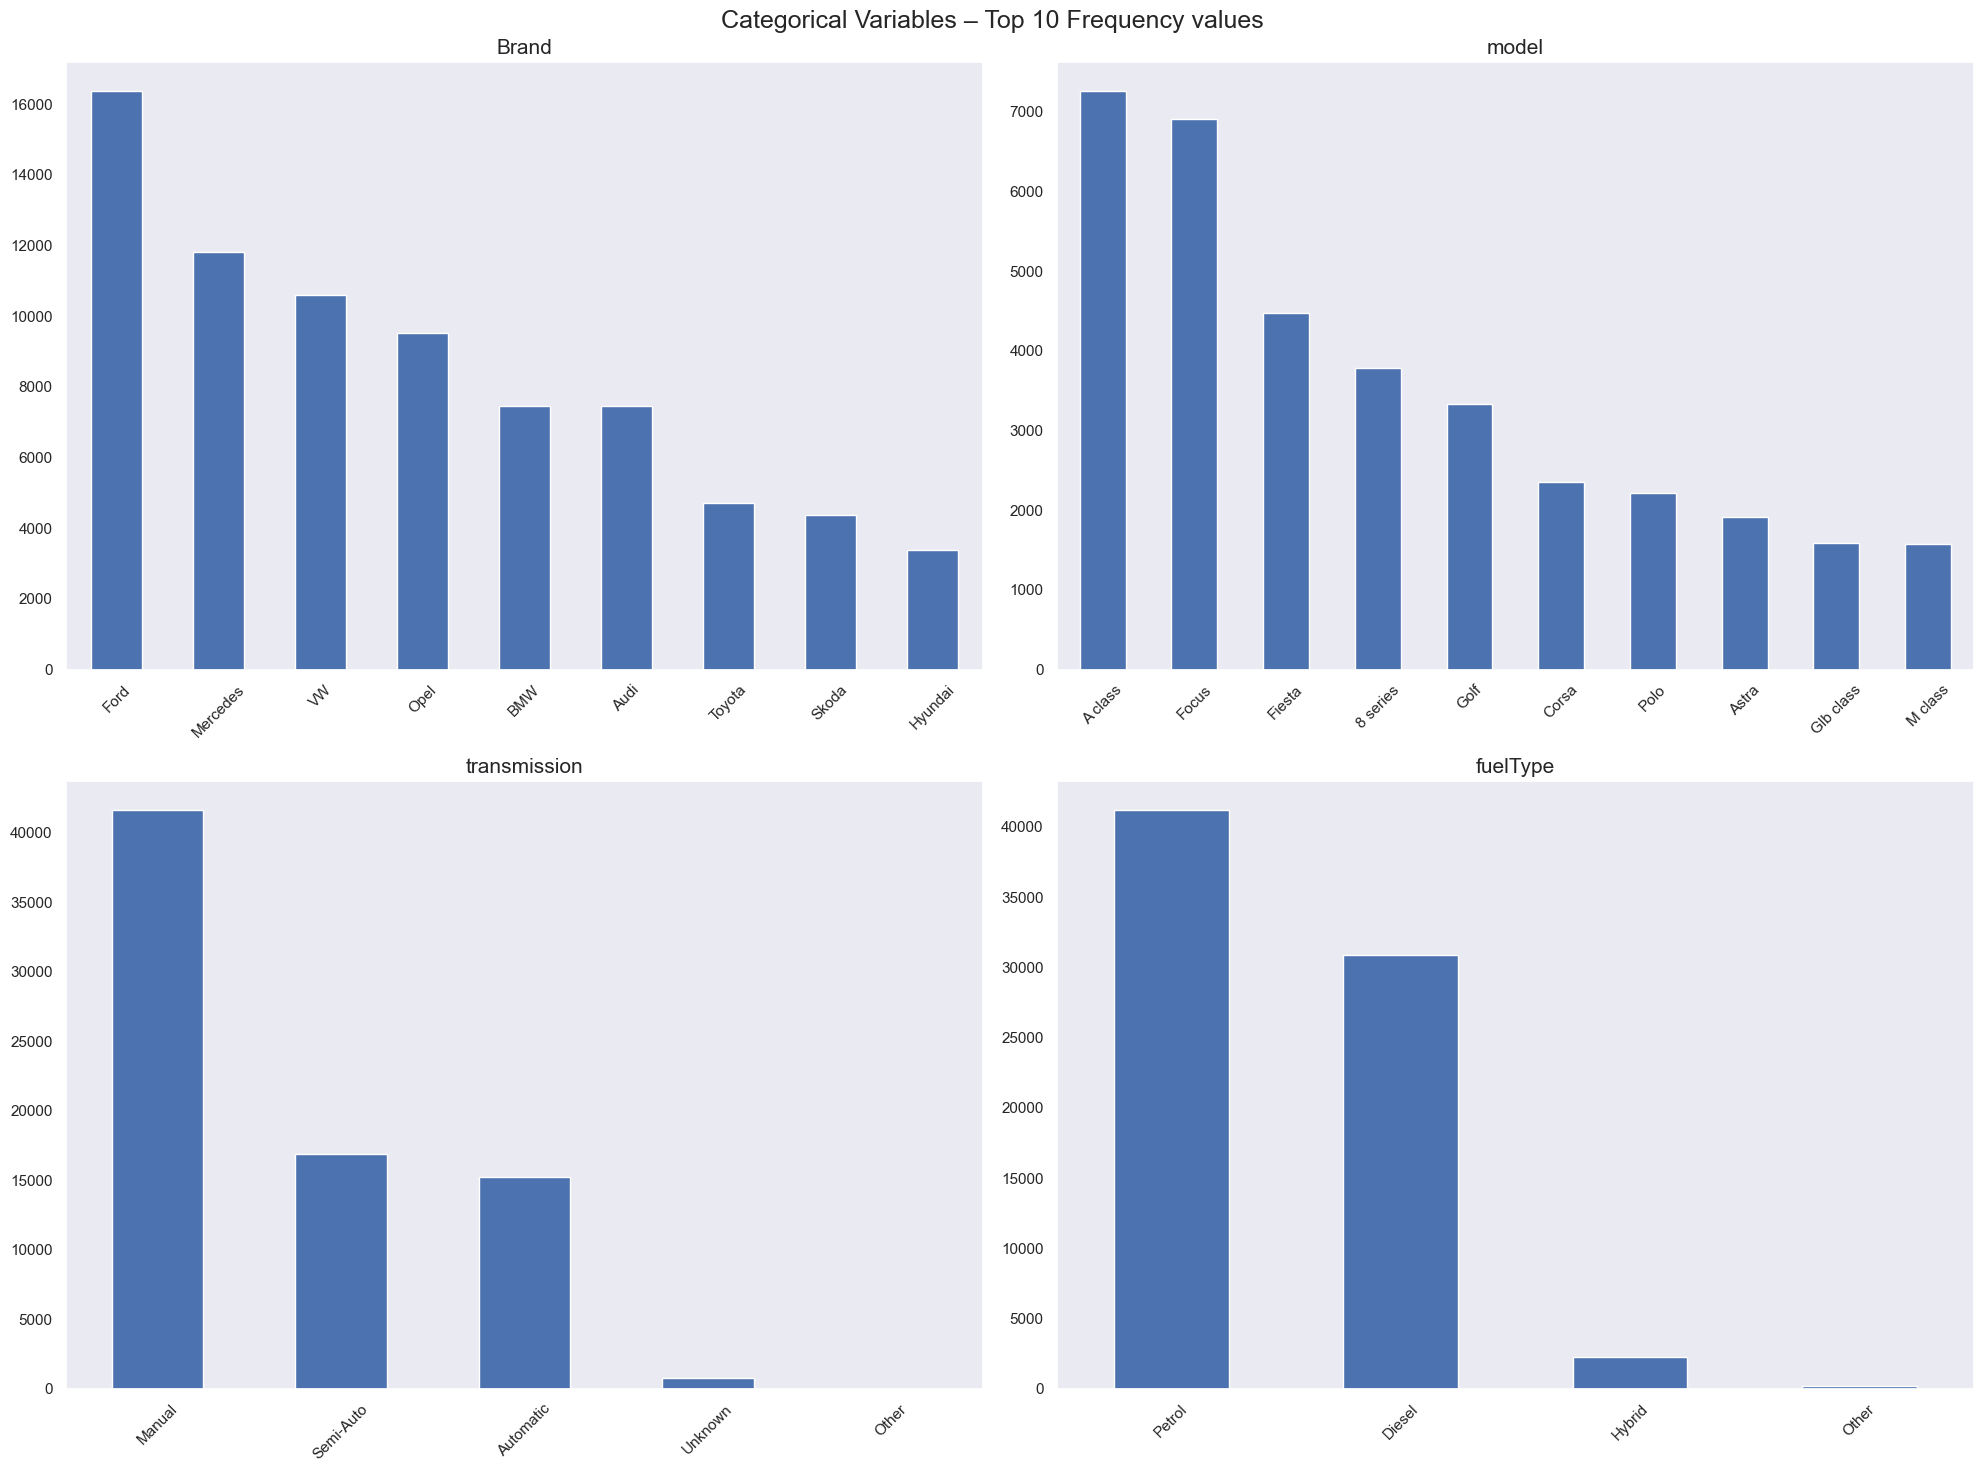

In [60]:
sns.set(style= "dark")

non_metric_features = data.select_dtypes(exclude= np.number)

fig, axes = plt.subplots(2, 2, figsize=(20, 15))

for ax, feat in zip(axes.flatten(), non_metric_features):
    # use df_deps
    data[feat].value_counts().head(10).plot(kind= "bar", ax=ax)
    ax.set_title(feat, fontsize = 15)
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel("")

plt.suptitle("Categorical Variables – Top 10 Frequency values", fontsize=18)
plt.tight_layout()

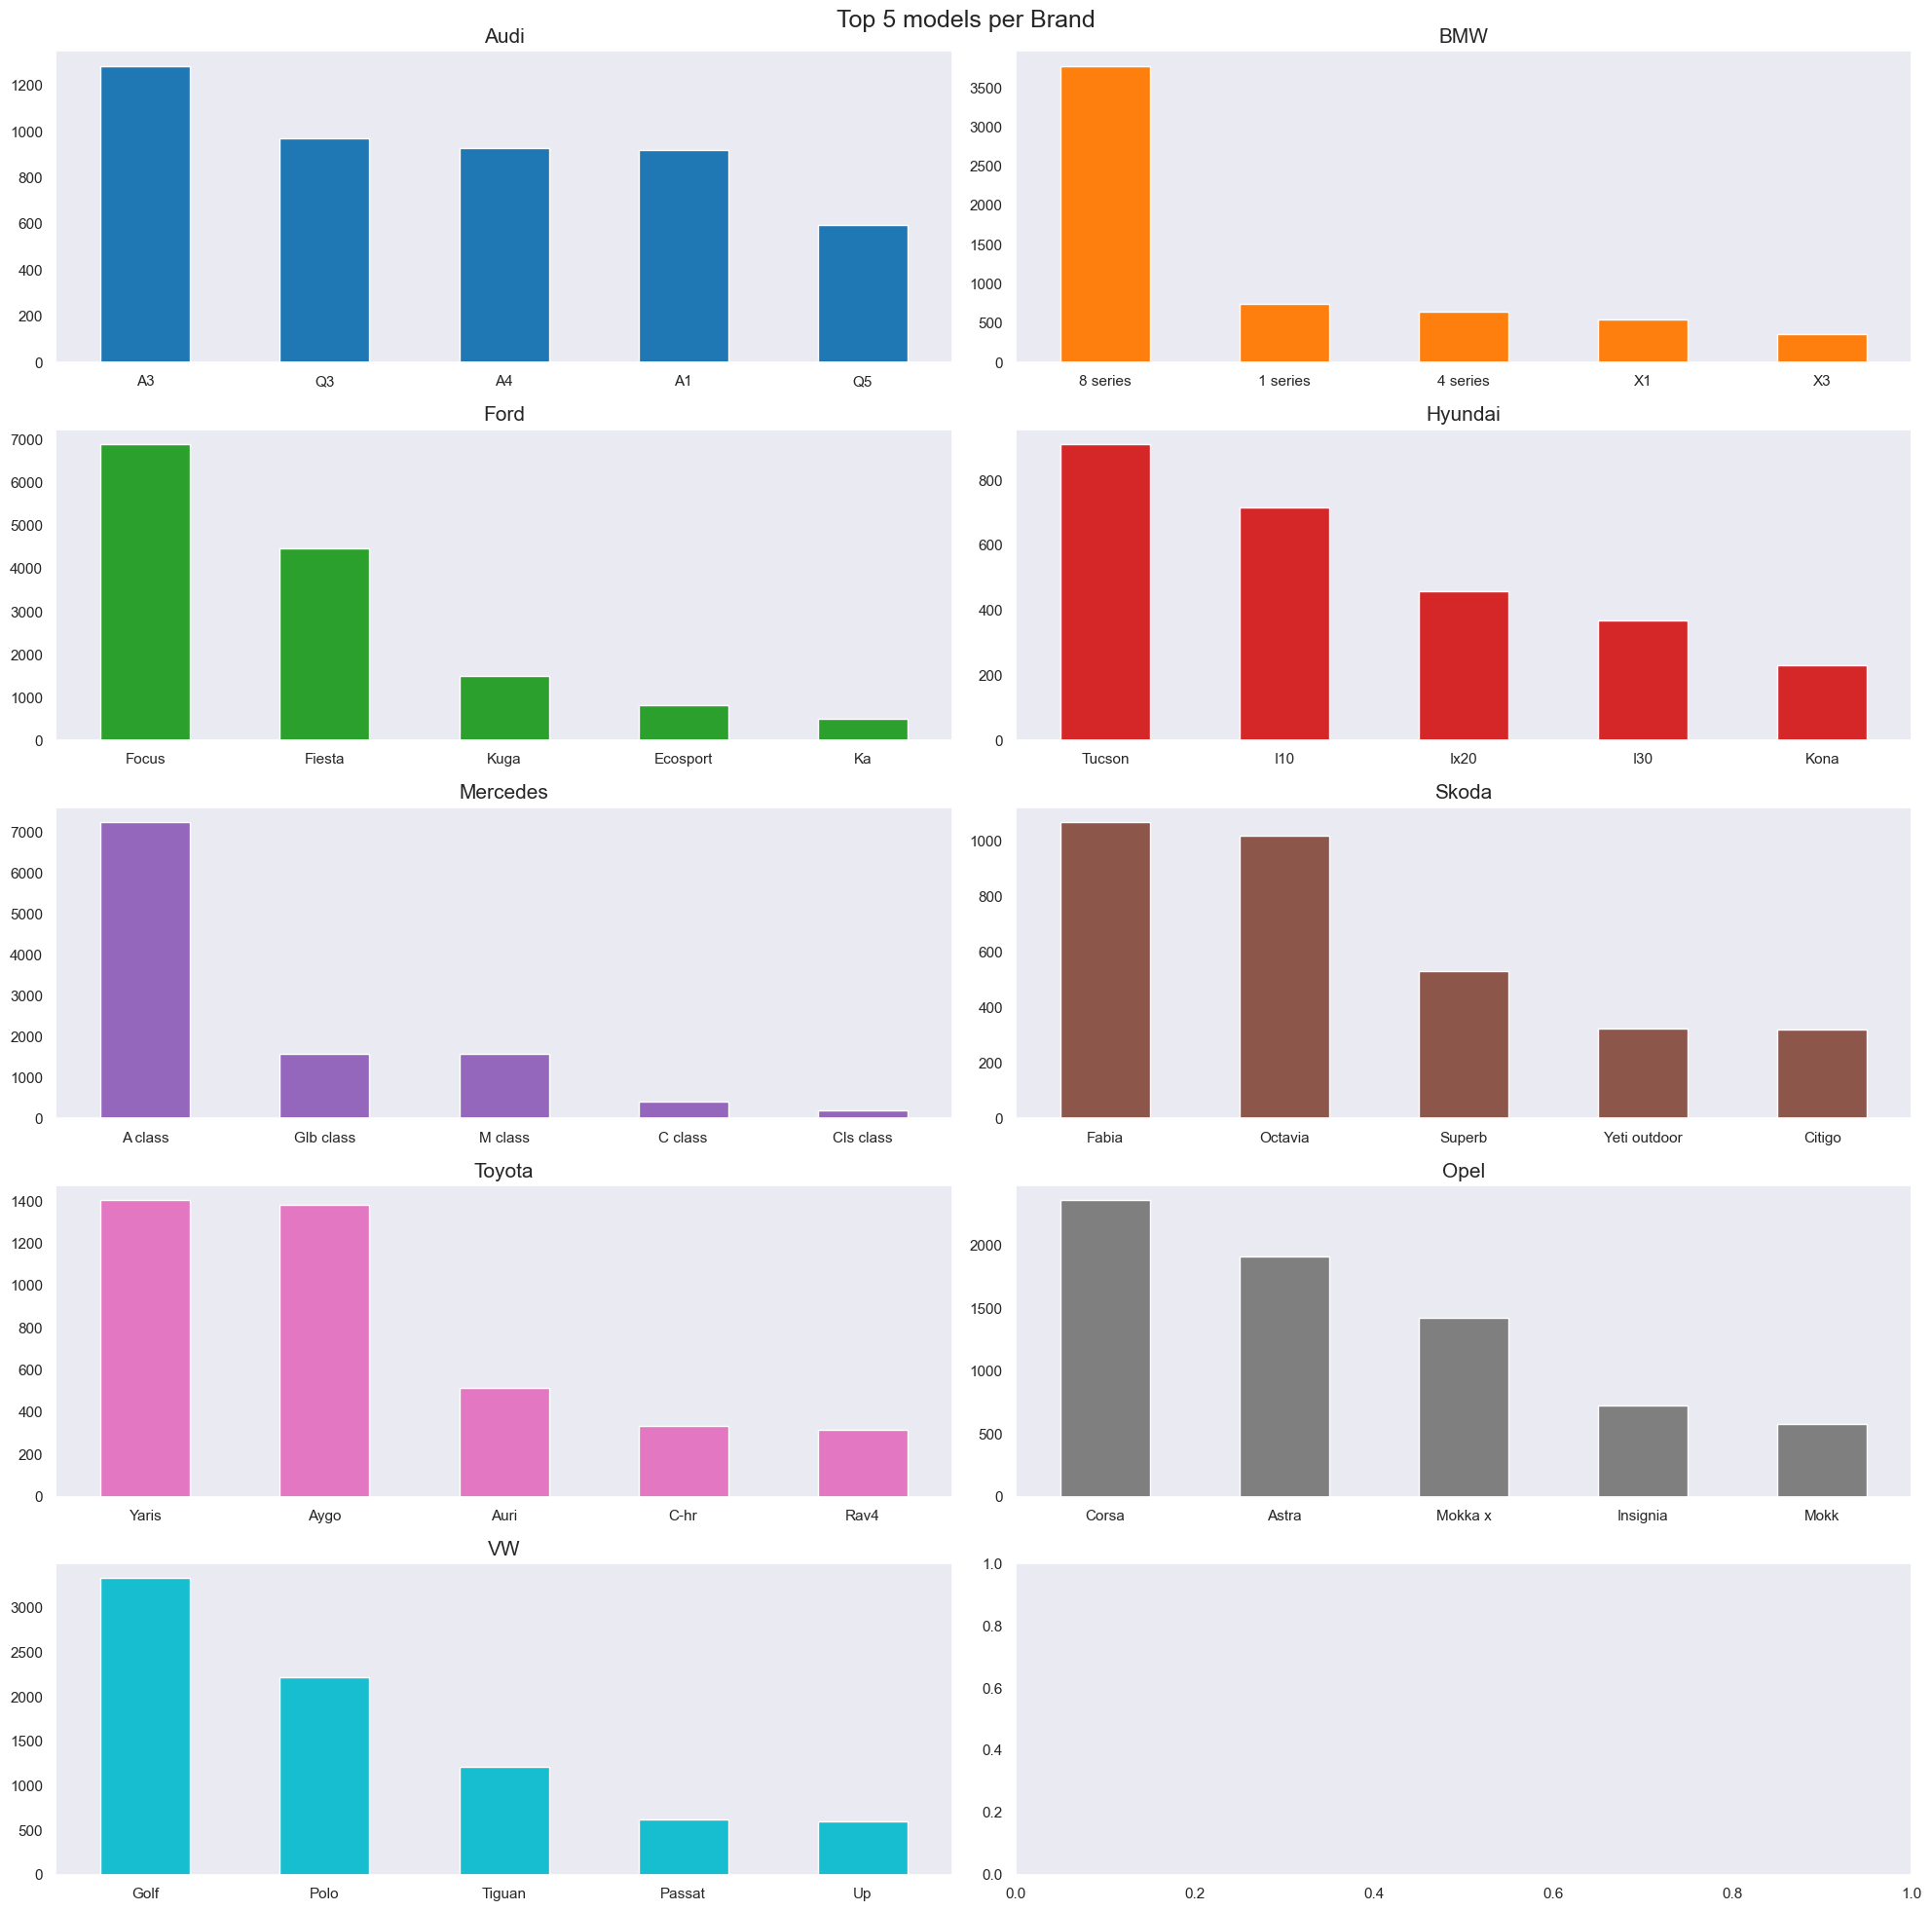

In [61]:
sns.set(style= "dark")
colors = [
    "#1f77b4",  # blue
    "#ff7f0e",  # orange
    "#2ca02c",  # green
    "#d62728",  # red
    "#9467bd",  # purple
    "#8c564b",  # brown
    "#e377c2",  # pink
    "#7f7f7f",  # gray
    "#17becf"   # cyan
]


fig, axes = plt.subplots(5, 2, figsize=(20, 20))

for ax, brand, color in zip(axes.flatten(), data["Brand"].dropna().unique(), colors):
    
    data["model"][data["Brand"] == brand].value_counts().head(5).plot(kind= "bar", ax=ax, color = color)
    ax.set_title(brand, fontsize = 15)
    ax.tick_params(axis='x', rotation=0)
    ax.set_xlabel("")

plt.suptitle("Top 5 models per Brand", fontsize=18)
plt.tight_layout()

## Bivariate Distribution
[Back to TOC](#toc)

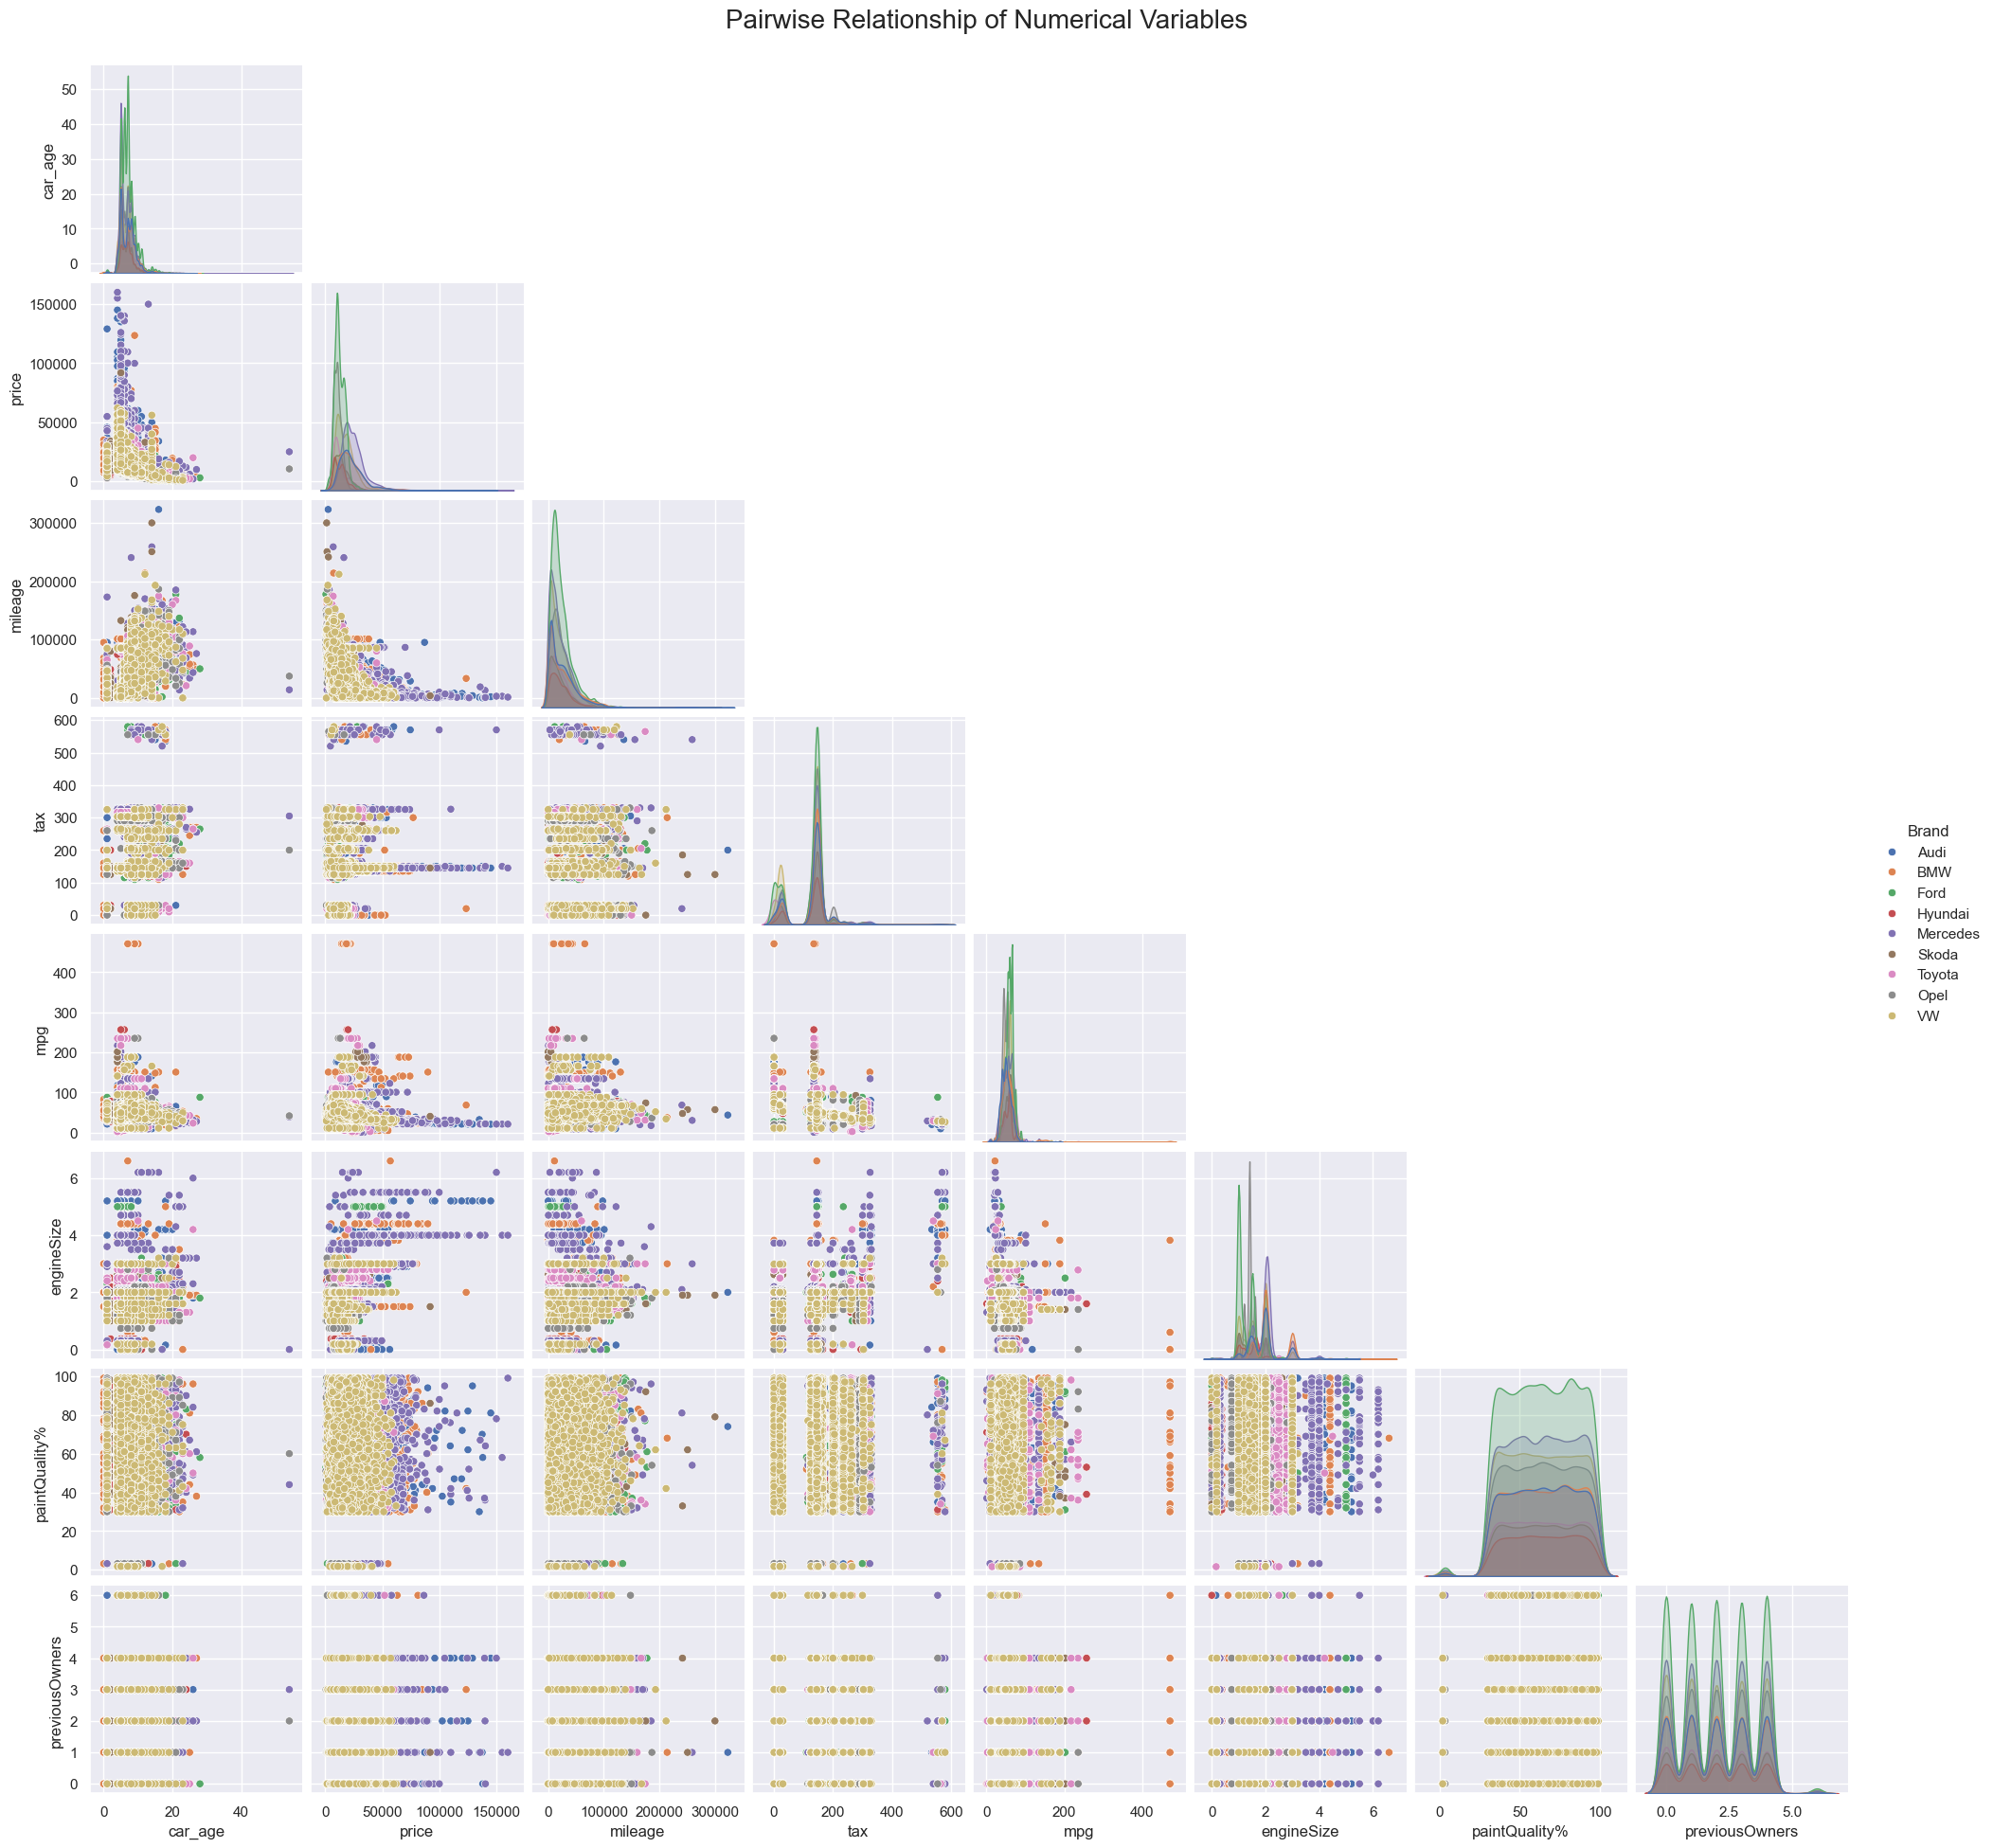

In [62]:
sns.set()

metric_features = data[data.select_dtypes(include=np.number).columns.to_list() + ["Brand"]]

g = sns.pairplot(metric_features, hue= "Brand")

# Mask the upper triangle
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)
plt.show()


Insights:

- "VW" seems to be the brand that has the cheapest cars and also with lowers quality attributes.

- "Mercedes" and "Audi" seems to be the brand with the most expensive cars.

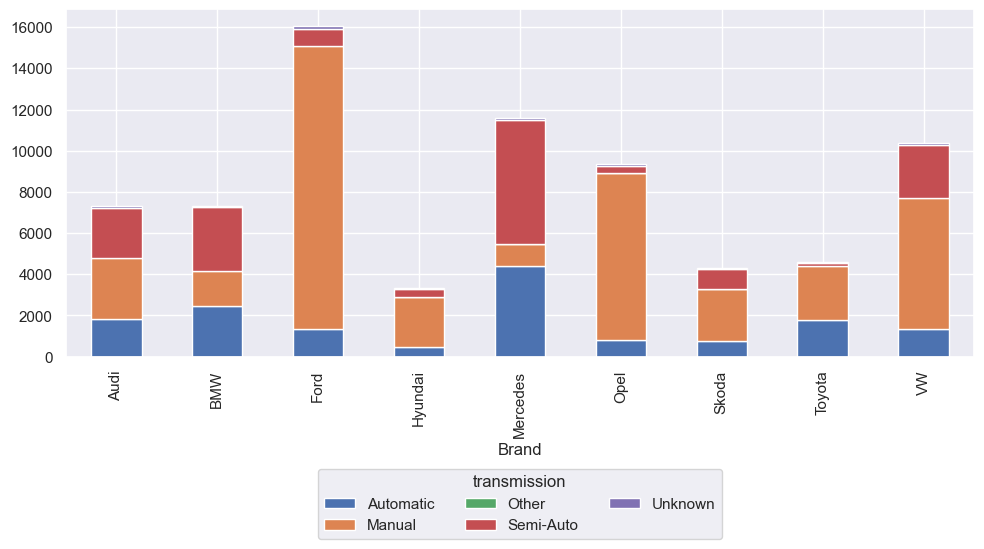

In [63]:
#Stack bar chart of Brand and transmission

pd.crosstab(non_metric_features["Brand"], data['transmission']).plot(kind='bar', stacked=True, figsize=(10,6))
plt.legend(title="transmission", loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.tight_layout()

plt.show()

Insights taken by the analysis of the plot:

**Audi**: The transmisson type is fairly distributed by the Audi cars

**BMW**: The transmisson type is fairly distributed by the BMW cars

**Ford**: The majority of ford cars have manual transmission

**Hyundai**: Most of hyundai cars have also manual transmission

**Mercedes**: Most of the cars are either Automatic or semi-auto, they don't have a lot of manual cars

**Opel**: The majority of Opel cars have manual transmission

**Skoda**: The majority of skoda cars have manual transmission

**Toyota**: The majority of skoda cars have manual transmission, and almost no semi-auto

**VW**: More distributed, but the mojority is still manual transmission

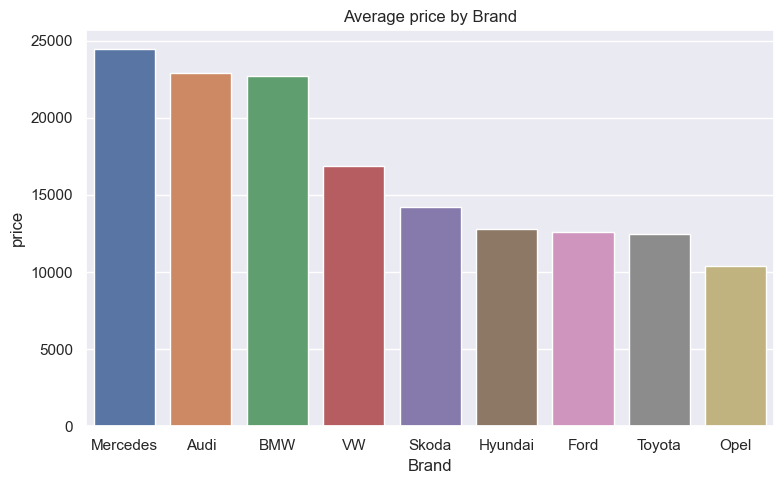

In [64]:
num_per_cat(data, "price", "Brand")

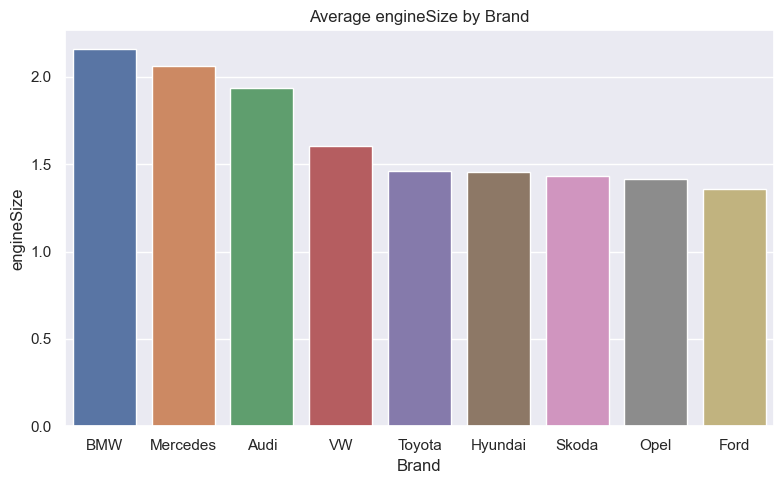

In [67]:
num_per_cat(data, "engineSize", "Brand")

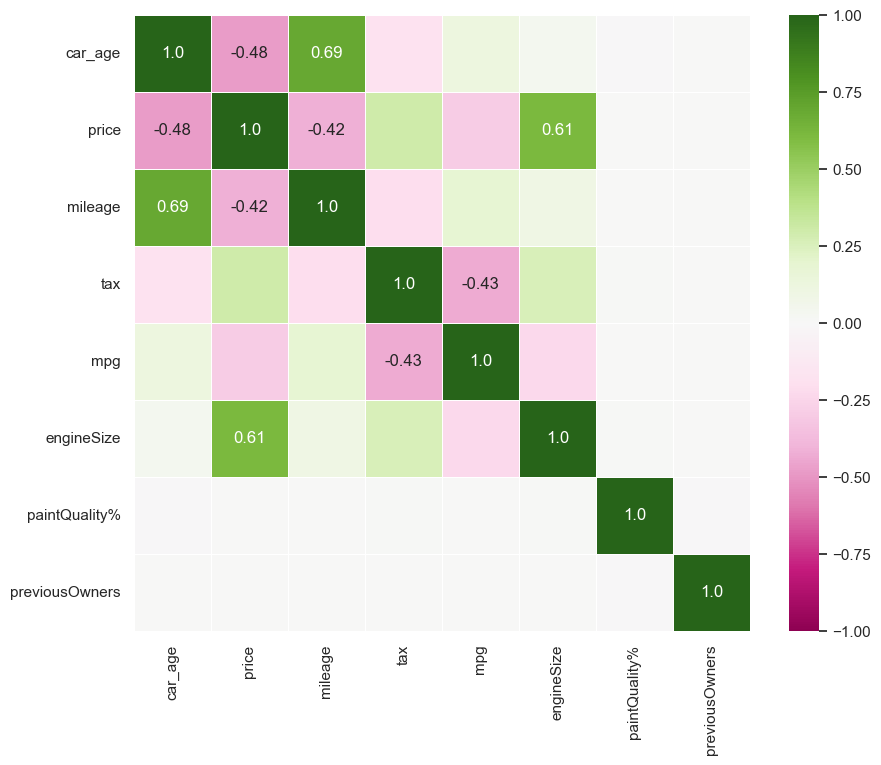

In [65]:
metric_features = data.select_dtypes(include= np.number)

corr = metric_features.corr(method="pearson")
corr = corr.round(2)

mask_annot = np.absolute(corr.values) >= 0.4

annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) 

fig = plt.figure(figsize=(10, 8))

# Plotting the heatmap of the correlation matrix
sns.heatmap(data=corr, 
            annot=annot, # Specifing custom annotation
            fmt='s', # The annotation matrix now has strings, so we need to explicitly say this
            vmin=-1, vmax=1, 
            center=0,
            square=True, # Make each cell square-shaped
            linewidths=.5, # Adding lines between cells
            cmap='PiYG' # Diverging color map
            )

plt.show()


Insights:
- "EngineSize" is the most correlated variable with the target variable "price".
- "Mileage" has a correlation of -0,69 with "price", which means the higher the mileage, the lower the price.

In [66]:
data.to_csv("/Users/miguelmatos/Documents/GitHub/Machine_Learning_project/ML_Project_Group42/data/data_cleaned.csv")